In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
from sklearn.linear_model import OrthogonalMatchingPursuit
from scipy.fftpack import dct, idct
from sklearn.linear_model import Lasso

In [33]:
def L1_norm(x):
    return np.linalg.norm(x, ord=1)

In [44]:
def experiment(K, n, graph_l0=True, graph_l1=True, graph_l2=True):

    # creating s from K
    s = np.zeros(n)
    s[:K] = np.random.normal(size=K)
    np.random.shuffle(s) # randomly sparse with elements from K

    # creating the fourier basis
    psi = dct(np.eye(n), axis=0)

    errors_2 = []
    errors_1 = []
    errors_0 = []

    ps = range(1, 101)

    # C is a gaussian random sampling matrix
    for p in ps:

        error_2 = []
        error_1 = []
        error_0 = []

        # for when you do 10 for each p
        for _ in range(10):

            # finding C
            C = np.random.normal(size=(p, n))


            # finding measurement vector y
            y = C @ psi @ s
            Theta = C @ psi

            #for L1 minimization
            # initial condition (s) and constrains
            # x0 = np.linalg.pinv(Theta) @ y # L2 minimum norm solution
            # constr = ({'type': 'eq', 'fun': lambda x: Theta @ x - y})
            
            # # L1 minimization
            # res = minimize(fun=L1_norm, x0=x0, method='SLSQP', constraints=constr)

            # s_hat = res.x

            # lasso = Lasso(alpha=1)
            # lasso.fit(Theta, y)
            # s_hat = lasso.coef_

            s_hat = np.linalg.lstsq(Theta,y)[0]

            # decreasing
            error_2.append(np.linalg.norm(s_hat - s, ord=2) / np.linalg.norm(s))

            # increasing
            error_1.append(np.linalg.norm(s_hat - s, ord=1) / np.linalg.norm(s))

            # not changing -> only counts non-zero errors
            error_0.append(np.linalg.norm(s_hat - s, ord=0) / np.linalg.norm(s))



        errors_2.append(np.mean(error_2))
        errors_1.append(np.mean(error_1))
        errors_0.append(np.mean(error_0))


    # plt.figure(figsize=(30, 5))

    if graph_l0:
        # L0 error plot
        # plt.subplot(1, 3, 1)
        plt.plot(ps, errors_0)
        plt.xlabel("p")
        plt.ylabel("L0 Average Relative Error")
        plt.title(f"K={K} and n={n}")
        plt.show()

    if graph_l1:
        # L1 error plot
        # plt.subplot(1, 3, 2)
        plt.plot(ps, errors_1)
        plt.xlabel("p")
        plt.ylabel("L1 Average Relative Error")
        plt.title(f"K={K} and n={n}")
        plt.show()

    if graph_l2:
        # L2 error plot
        # plt.subplot(1, 3, 3)
        plt.plot(ps, errors_2)
        plt.xlabel("p")
        plt.ylabel("L2 Average Relative Error")
        plt.title(f"K={K} and n={n}")
        plt.show()



# First Experiment

C:\Users\itsjo\AppData\Local\Temp\ipykernel_15540\1210248013.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s_hat = np.linalg.lstsq(Theta,y)[0]


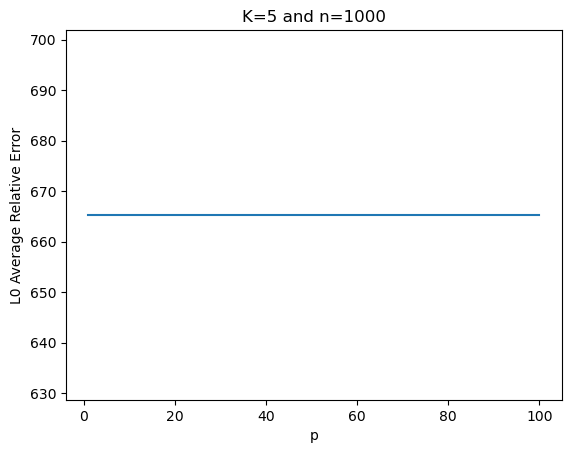

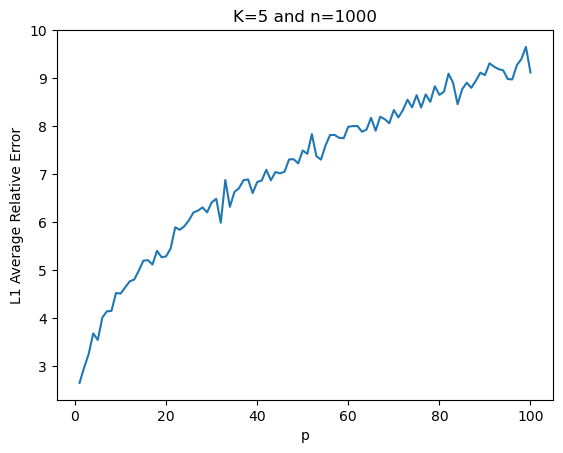

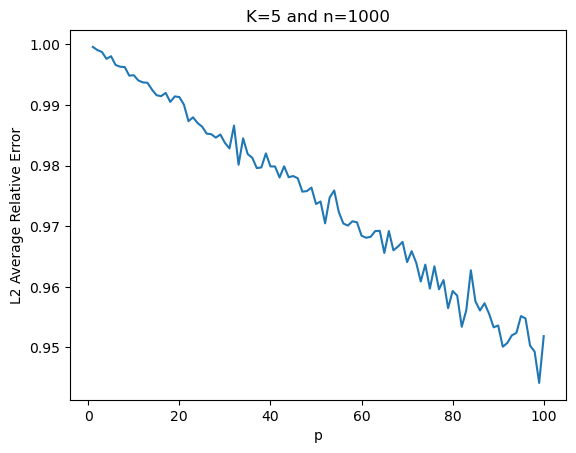

In [45]:
n = 1000
K = 5

experiment(K, n)

## Second Experiment

C:\Users\itsjo\AppData\Local\Temp\ipykernel_15540\1210248013.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s_hat = np.linalg.lstsq(Theta,y)[0]


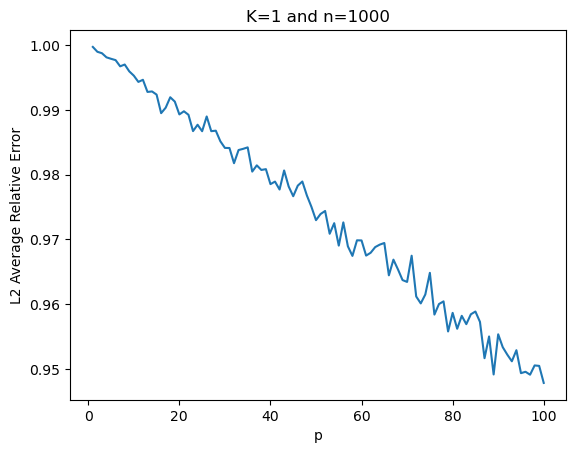

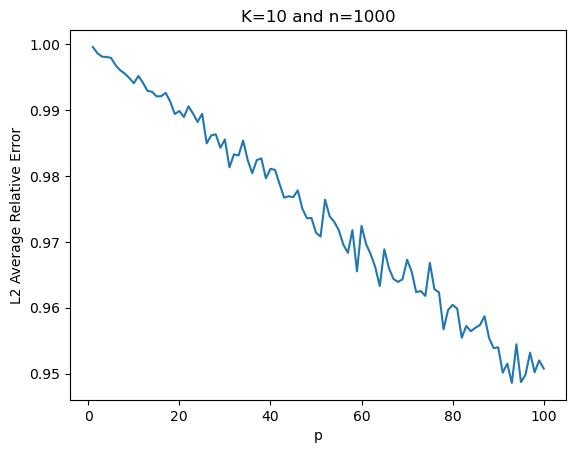

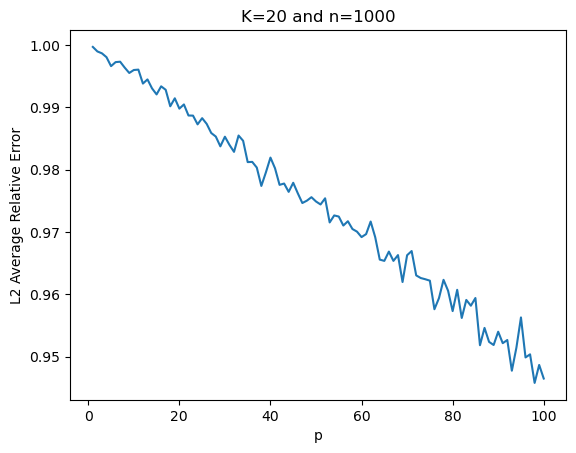

In [47]:
for K in [1, 10, 20]:
    experiment(K=K, n=1000, graph_l0=False, graph_l1=False, graph_l2=True)

# obviously L0 norm changes here -> K the non zero terms in s are changing
    
# L1 norm DOES change -> decreases for smaller K. less initial samples in S. means it's easier to spread adjusted s with the 2 norm because it is more sparse in the beginning. 
    
# L2 norm DOES NOT change
    


# Third Experiment

We see as n increases, error decreases much slower. This is because there are more coefficients to estimate, making it harder for the least squares algorithm to approximate, although it does decrease overfitting.

C:\Users\itsjo\AppData\Local\Temp\ipykernel_15540\1210248013.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s_hat = np.linalg.lstsq(Theta,y)[0]


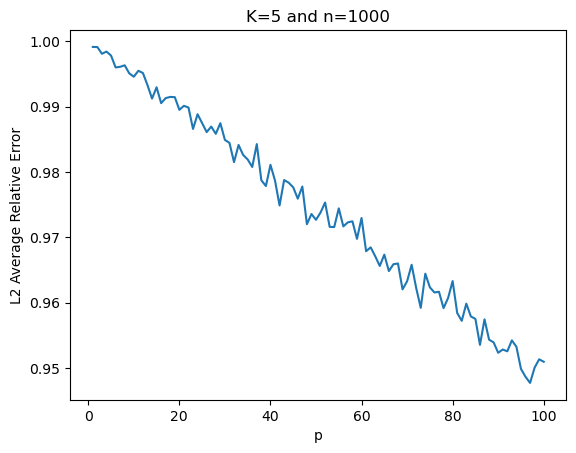

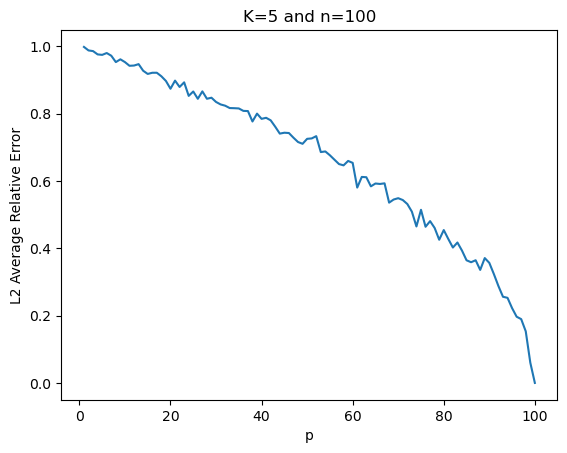

In [49]:
n = 1000

experiment(K=5, n=1000, graph_l0=False, graph_l1=False, graph_l2=True)
experiment(K=5, n=100, graph_l0=False, graph_l1=False, graph_l2=True)

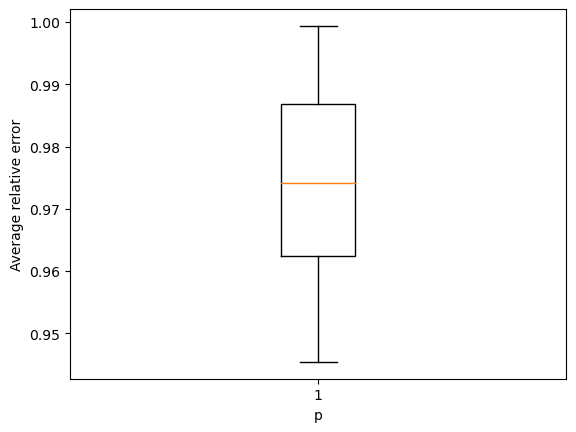

In [66]:
# # plot relative errors
# plt.boxplot(errors_2)
# plt.xlabel('p')
# plt.ylabel('Average relative error')
# plt.show()